TALLER 2. ANALISIS UNIVARIADO PARA PROYECTO PREDICCION DE PRECIO DE CIERRE DE BTC VS USDT

Estudiante: Albin Rivera Paja

1. SELECCION Y DESCRIPCION DE LA COLUMNA SELECCIONADA. 

La variable "close" es la variable seleccionada para llevar a cabo el analisis univariado, debido a que se usa como identificador de tendencia(objetivo de este proyecto). Dicha variable guarda la ultima opinion del mercado sobre el valor del activo para un periodo determinado, en este caso de 4 horas, ademas de definir patrones historicos del mercado. Tambien sirve como base para indicadores tecnicos como medias moviles exponenciales, medias moviles simples, RSI, Fuerza de momentum entre otras, que de igual forma sirven tambien para proyectar movimientos futuros.

1.1. EXPLORACION DE DATOS

Lo primero que se realiza es la carga de librerias y la base de datos:

In [1]:
#Carga de librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
#Carga de base de datos
path="Data/Bronce.precio_BTCUSDT_4h_Binance.csv"
df = pd.read_csv(path)
df

,_id,timestamp,open,high,low,close,volume
0,66c11d3ad200ba7478e85a1f,1502956800000,4333.32,4485.39,4333.32,4427.30,63.619882
1,66c11d3ad200ba7478e85a20,1502971200000,4436.06,4485.39,4333.42,4352.34,174.562001
2,66c11d3ad200ba7478e85a21,1502985600000,4352.33,4354.84,4200.74,4325.23,225.109716
3,66c11d3ad200ba7478e85a22,1503000000000,4307.56,4369.69,4258.56,4285.08,249.769913
4,66c11d3ad200ba7478e85a23,1503014400000,4285.08,4340.62,4134.61,4292.39,276.193043
...,...,...,...,...,...,...,...
15340,66c11d44d200ba7478e8960b,1723867200000,59158.36,59263.47,59051.98,59248.00,1106.844530
15341,66c11d44d200ba7478e8960c,1723881600000,59248.00,59477.16,59060.00,59137.12,1327.011360
15342,66c11d44d200ba7478e8960d,1723896000000,59137.12,59654.90,59100.28,59388.11,1490.864120
15343,66c11d44d200ba7478e8960e,1723910400000,59388.11,59700.00,59294.31,59473.19,1157.010550


In [3]:
# Identificar la cantidad de columnas y filas del dataframe
df.shape

(15345, 7)

In [4]:
#Visualizar las primeras 5 filas del dataframe
df.head()
     

,_id,timestamp,open,high,low,close,volume
0,66c11d3ad200ba7478e85a1f,1502956800000,4333.32,4485.39,4333.32,4427.30,63.619882
1,66c11d3ad200ba7478e85a20,1502971200000,4436.06,4485.39,4333.42,4352.34,174.562001
2,66c11d3ad200ba7478e85a21,1502985600000,4352.33,4354.84,4200.74,4325.23,225.109716
3,66c11d3ad200ba7478e85a22,1503000000000,4307.56,4369.69,4258.56,4285.08,249.769913
4,66c11d3ad200ba7478e85a23,1503014400000,4285.08,4340.62,4134.61,4292.39,276.193043


In [5]:
#Visualizar las últimas 5 filas del dataframe
df.tail()

,_id,timestamp,open,high,low,close,volume
15340,66c11d44d200ba7478e8960b,1723867200000,59158.36,59263.47,59051.98,59248.00,1106.84453
15341,66c11d44d200ba7478e8960c,1723881600000,59248.00,59477.16,59060.00,59137.12,1327.01136
15342,66c11d44d200ba7478e8960d,1723896000000,59137.12,59654.90,59100.28,59388.11,1490.86412
15343,66c11d44d200ba7478e8960e,1723910400000,59388.11,59700.00,59294.31,59473.19,1157.01055
15344,66c11d44d200ba7478e8960f,1723924800000,59473.19,59500.00,59113.68,59306.24,472.29437


In [6]:
# Identificar el tipo de dato de df
df.dtypes

_id           object
timestamp      int64
open         float64
high         float64
low          float64
close        float64
volume       float64
dtype: object

1.2. CONVERTIR EL TIPO DE DATO AL REQUERIDO PARA EL PROYECTO

Debido a que se va a llevar a cabo un proyecto de series de tiempo, es necesario crear una variable "fecha" a partir de la variable timestamp (la cual esta en tiempo unix en milisegundos), dicha variable debe ser primero convertida a formato datatime:

In [7]:
#Crear la columna fecha a partir de la columna timestamp
df['fecha'] = pd.to_datetime(df['timestamp'], unit='ms')
# Verificar que la columna 'fecha' se haya creado correctamente
print(df[['timestamp', 'fecha']].head())

       timestamp               fecha
0  1502956800000 2017-08-17 08:00:00
1  1502971200000 2017-08-17 12:00:00
2  1502985600000 2017-08-17 16:00:00
3  1503000000000 2017-08-17 20:00:00
4  1503014400000 2017-08-18 00:00:00


Con el paso anterior se verifica la creación de la nueva variable y que cumpla el formato tipo datatime:

In [8]:
# Identificar el tipo de dato de df
df.dtypes

_id                  object
timestamp             int64
open                float64
high                float64
low                 float64
close               float64
volume              float64
fecha        datetime64[ns]
dtype: object

1.3. BUSQUEDA Y TRATAMIENTO DE DUPLICADOS

In [9]:
#Verificar duplicidad en los datos
num_duplicados = df.duplicated(subset='fecha').sum()
print(f"Cantidad de datos duplicados: {num_duplicados}")

Cantidad de datos duplicados: 15


Debido a que se identifican 15 datos duplicados en el dataframe, se procede a verificar una muestra de dichos duplicados:

In [10]:
# Verificar y mostrar una muestra de los datos duplicados
duplicados = df[df.duplicated(subset='fecha', keep=False)]
print("Datos duplicados:")
duplicados.head()  # Mostrar las primeras filas de los datos duplicados

Datos duplicados:


,_id,timestamp,open,high,low,close,volume,fecha
999,66c11d3ad200ba7478e85e06,1517342400000,10380.00,10565.84,10095.31,10237.51,4737.906346,2018-01-30 20:00:00
1000,66c11d3ad200ba7478e85e07,1517342400000,10380.00,10565.84,10095.31,10237.51,4737.906346,2018-01-30 20:00:00
1999,66c11d3ad200ba7478e861ee,1531872000000,7317.44,7550.00,7309.64,7457.03,9867.367577,2018-07-18 00:00:00
2000,66c11d3bd200ba7478e861ef,1531872000000,7317.44,7550.00,7309.64,7457.03,9867.367577,2018-07-18 00:00:00
2999,66c11d3bd200ba7478e865d6,1546272000000,3752.22,3776.85,3630.33,3687.47,6179.613282,2018-12-31 16:00:00


Ahora se procede a eliminar los duplicados para limpiar el dataframe:

In [11]:
# Eliminar duplicados a partir de la columna fecha
df.drop_duplicates(subset='fecha', inplace=True)  

Se verifica que efectivamente se haya eliminado los duplicados:

In [12]:
#Verificar duplicidad en los datos
num_duplicados = df.duplicated(subset='fecha').sum()
print(f"Cantidad de datos duplicados: {num_duplicados}")

Cantidad de datos duplicados: 0


1.4. IDENTIFICACION Y TRATAMIENTO DE VALORES UNICOS Y DATOS FALTANTES

Es importante asegurarse de como se comportan los datos en el dataframe, es decir si contamos con valores unicos o caso contrario vemos repetición de datos en el mismo, de acuerdo a lo siguiente, se puede evidenciar que en general todos los datos tienden a ser unicos, sin embargo como era de esperarse se pueden repetir datos en las variables open, high, low y close ya que el comportamiento del activo puede tomar un mismo valor n veces. 

In [13]:
#Identificar datos unicos
df.nunique()

_id          15330
timestamp    15330
open         15219
high         14313
low          14341
close        15211
volume       15330
fecha        15330
dtype: int64

Con lo anterior tambien podemos identificar la existencia de datos faltantes, lo cual sera verificado a continuación:

In [14]:
# Identificar datos faltantes
df.set_index('fecha', inplace=True)  # Establecer timestamp como índice
df = df.resample('4h').asfreq()  # Re-samplear a intervalos de 4 horas
missing_data = df[df.isnull().any(axis=1)]  # Filtrar filas con datos faltantes

print("Datos faltantes:")
print(missing_data)

# Imprimir la cantidad total de filas con datos faltantes
print("\nCantidad total de filas con datos faltantes:", missing_data.shape[0])

Datos faltantes:
                     _id  timestamp  open  high  low  close  volume
fecha                                                              
2018-02-08 04:00:00  NaN        NaN   NaN   NaN  NaN    NaN     NaN
2018-02-08 08:00:00  NaN        NaN   NaN   NaN  NaN    NaN     NaN
2018-02-08 12:00:00  NaN        NaN   NaN   NaN  NaN    NaN     NaN
2018-02-08 16:00:00  NaN        NaN   NaN   NaN  NaN    NaN     NaN
2018-02-08 20:00:00  NaN        NaN   NaN   NaN  NaN    NaN     NaN
2018-02-09 00:00:00  NaN        NaN   NaN   NaN  NaN    NaN     NaN
2018-02-09 04:00:00  NaN        NaN   NaN   NaN  NaN    NaN     NaN
2018-06-26 04:00:00  NaN        NaN   NaN   NaN  NaN    NaN     NaN
2018-06-26 08:00:00  NaN        NaN   NaN   NaN  NaN    NaN     NaN
2018-07-04 04:00:00  NaN        NaN   NaN   NaN  NaN    NaN     NaN
2018-11-14 04:00:00  NaN        NaN   NaN   NaN  NaN    NaN     NaN
2019-03-12 04:00:00  NaN        NaN   NaN   NaN  NaN    NaN     NaN
2019-05-15 04:00:00  NaN       

Efectivamente se identifica la ausencia de 16 datos, traduciendose esto en 16 filas completas que no fueron registradas. A continuación verificamos cuando en porcentaje representan los datos faltantes en el dataframe:

In [15]:
# Calcular el porcentaje de datos NaN en cada columna
porcentaje_nan = df.isna().mean() * 100
print("Porcentaje de datos NaN por columna:")
print(porcentaje_nan)

Porcentaje de datos NaN por columna:
_id          0.104262
timestamp    0.104262
open         0.104262
high         0.104262
low          0.104262
close        0.104262
volume       0.104262
dtype: float64


A partir de la identificación de los datos faltantes, se lleva a cabo 3 soluciones: 

Eliminación de datos faltantes (ya que este no supera ni el 1% del total de los datos), 
Interpolación Spline
Interpolación con ARIMA

Se aplica como imputacion de datos faltantes la Interpolación, ya que para este caso, es util en series de tiempo porque permite estimar valores faltantes basandose en los valores adyacentes. Tanto la Interpolación spline como la ARIMA, se aplican unicamente para la variable "close", que es la variable que se selecciono como importante para la entrega de este taller.

De igual forma para verificar cual es el mejor tratamiento de datos faltantes se aplica un modelo ARIMA para cada una de las soluciones, verificando cual de las 3 arroja el mejor MSE y RMSE.

A continuación se presentan las 3 soluciones planteadas, con su respectivo modelo ARIMA y sus respectivos MSE y RMSE:

SOLUCION ELIMINACIÓN DE DATOS FALTANTES

A continuación se lleva a cabo la eliminación de las 16 filas con datos faltantes quedando un total de filas de 15346:

In [16]:
# Crear una copia del DataFrame original
df_nulos = df.copy()

# Eliminar filas con datos faltantes
df_sin_nulos = df_nulos.dropna()

# Mostrar la cantidad de filas antes y después de eliminar los datos nulos
print(f"Cantidad de filas antes de eliminar nulos: {df.shape[0]}")
print(f"Cantidad de filas después de eliminar nulos: {df_sin_nulos.shape[0]}")

# Mostrar un ejemplo de los datos sin nulos
print(df_sin_nulos.head())

Cantidad de filas antes de eliminar nulos: 15346
Cantidad de filas después de eliminar nulos: 15330
                                          _id     timestamp     open     high  \
fecha                                                                           
2017-08-17 08:00:00  66c11d3ad200ba7478e85a1f  1.502957e+12  4333.32  4485.39   
2017-08-17 12:00:00  66c11d3ad200ba7478e85a20  1.502971e+12  4436.06  4485.39   
2017-08-17 16:00:00  66c11d3ad200ba7478e85a21  1.502986e+12  4352.33  4354.84   
2017-08-17 20:00:00  66c11d3ad200ba7478e85a22  1.503000e+12  4307.56  4369.69   
2017-08-18 00:00:00  66c11d3ad200ba7478e85a23  1.503014e+12  4285.08  4340.62   

                         low    close      volume  
fecha                                              
2017-08-17 08:00:00  4333.32  4427.30   63.619882  
2017-08-17 12:00:00  4333.42  4352.34  174.562001  
2017-08-17 16:00:00  4200.74  4325.23  225.109716  
2017-08-17 20:00:00  4258.56  4285.08  249.769913  
2017-08-18 00:00:00 

INTERPOLACION SPLINE

Este metodo de imputacion se aplica ya que los datos faltantes son pocos y estan dispersos en intervalos cortos, además de que los valores de la serie de tiempo cambian de manera no lineal. A continuación se muestra el proceso de interpolación Spline y se verifica que se haya imputado los NAN de la variable "close":

In [17]:
# Crear una copia del DataFrame original
df_interpolated = df.copy()

# Aplicar la interpolación en la columna 'close'
df_interpolated['close'] = df_interpolated['close'].interpolate(method='spline', order=2)
#df_interpolated = df.interpolate(method='polynomial', order=2)

In [18]:
# Calcular el porcentaje de datos NaN en cada columna
porcentaje_nan = df_interpolated.isna().mean() * 100
print("Porcentaje de datos NaN por columna:")
print(porcentaje_nan)

Porcentaje de datos NaN por columna:
_id          0.104262
timestamp    0.104262
open         0.104262
high         0.104262
low          0.104262
close        0.000000
volume       0.104262
dtype: float64


INTERPOLACION CON ARIMA

Este metodo de interpolación es más avanzado y tiene en cuenta las características temporales de los datos de esta serie de tiempo. Sin embargo puede ser mas complejo computacionalmente, pero en vista de que no son muchos datos que se tienen que imputar y se quiere una interpolación mas precisa, se opta por implementar este metodo el cual se presenta a continuación:

In [19]:
import warnings

# Para ignorar todas las advertencias
warnings.filterwarnings('ignore')

# Crear una copia del DataFrame
df_interpolated_arima = df.copy()

# Iterar sobre las filas con datos faltantes
for i in range(len(df)):
    if pd.isna(df['close'].iloc[i]):
        # Definir la serie hasta el punto faltante, ignorando los NaNs
        train_data = df_interpolated_arima['close'][:i].dropna()
        
        # Ajustar el modelo ARIMA a los datos disponibles
        model = ARIMA(train_data, order=(5, 1, 0))  # Order=(p,d,q) puedes ajustar p,d,q según la serie temporal
        model_fit = model.fit()

        # Predecir el valor faltante
        pred = model_fit.forecast(steps=1)[0]

        # Rellenar el valor faltante
        df_interpolated_arima['close'].iloc[i] = pred

# Mostrar el DataFrame con los valores interpolados
print(df_interpolated_arima)

                                          _id     timestamp      open  \
fecha                                                                   
2017-08-17 08:00:00  66c11d3ad200ba7478e85a1f  1.502957e+12   4333.32   
2017-08-17 12:00:00  66c11d3ad200ba7478e85a20  1.502971e+12   4436.06   
2017-08-17 16:00:00  66c11d3ad200ba7478e85a21  1.502986e+12   4352.33   
2017-08-17 20:00:00  66c11d3ad200ba7478e85a22  1.503000e+12   4307.56   
2017-08-18 00:00:00  66c11d3ad200ba7478e85a23  1.503014e+12   4285.08   
...                                       ...           ...       ...   
2024-08-17 04:00:00  66c11d44d200ba7478e8960b  1.723867e+12  59158.36   
2024-08-17 08:00:00  66c11d44d200ba7478e8960c  1.723882e+12  59248.00   
2024-08-17 12:00:00  66c11d44d200ba7478e8960d  1.723896e+12  59137.12   
2024-08-17 16:00:00  66c11d44d200ba7478e8960e  1.723910e+12  59388.11   
2024-08-17 20:00:00  66c11d44d200ba7478e8960f  1.723925e+12  59473.19   

                         high       low     close 

In [20]:
# Calcular el porcentaje de datos NaN en cada columna
porcentaje_nan = df_interpolated_arima.isna().mean() * 100
print("Porcentaje de datos NaN por columna:")
print(porcentaje_nan)

Porcentaje de datos NaN por columna:
_id          0.104262
timestamp    0.104262
open         0.104262
high         0.104262
low          0.104262
close        0.000000
volume       0.104262
dtype: float64


Ya tratados los datos nulos a partir de las 3 soluciones anteriores, aplicamos un modelo de ARIMA para identificar cual de estos metodos fue el mas efectivo:

2.5. MODELO ARIMA PARA EVALUAR EL IMPACTO DE LAS 3 SOLUCIONES DE TRATAMIENTO DE DATOS FALTANTES

Como la variable relevante para este taller es la columna "close", el tratamiento de los datos faltantes esta en función de dicha variable, asegurando que esta quede preparada para implementar modelos de series de tiempo. A continuación se presenta el resultado del modelo ARIMA para cada una de las soluciones propuestas para el tratamiento de los datos faltantes:

SOLUCION ELIMINACIÓN DE DATOS FALTANTES

Preparación de los datos

In [21]:
# Seleccionar solo la columna de interés (en este caso, el precio de cierre o close)
data = df_sin_nulos['close']

División en conjuntos de entrenamiento y prueba

In [22]:
# Dividir en 80% datos de entrenamiento y 20% datos de prueba
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

print(f'Tamaño del conjunto de entrenamiento: {len(train)}')
print(f'Tamaño del conjunto de prueba: {len(test)}')

Tamaño del conjunto de entrenamiento: 12264
Tamaño del conjunto de prueba: 3066


Entrenamiento del modelo ARIMA

In [23]:
import warnings

# Para ignorar todas las advertencias
warnings.filterwarnings('ignore')

# Definir el modelo ARIMA (p=5, d=1, q=0 son parámetros comunes; se pueden ajustar según los datos)
model = ARIMA(train, order=(5, 1, 0))

# Entrenar el modelo
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                12264
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -91335.903
Date:                Tue, 20 Aug 2024   AIC                         182683.806
Time:                        17:54:51   BIC                         182728.292
Sample:                             0   HQIC                        182698.713
                              - 12264                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0478      0.004    -11.189      0.000      -0.056      -0.039
ar.L2          0.0280      0.004      7.201      0.000       0.020       0.036
ar.L3          0.0247      0.004      5.681      0.0

Predicción y evaluación

In [24]:
import warnings

# Para ignorar todas las advertencias
warnings.filterwarnings('ignore')

# Realizar predicciones en el conjunto de prueba
predictions = model_fit.forecast(steps=len(test))

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse}')

Error Cuadrático Medio (MSE): 535435452.7283113
Raíz del Error Cuadrático Medio (RMSE): 23139.478229387787


INTERPOLACION SPLINE

Preparacion de datos

In [25]:
# Seleccionar solo la columna de interés (en este caso, el precio de cierre o close)
data_1 = df_interpolated['close']

División en conjuntos de entrenamiento y prueba

In [26]:
# Dividir en 80% datos de entrenamiento y 20% datos de prueba
train_size = int(len(data_1) * 0.8)
train_1, test_1 = data_1[:train_size], data_1[train_size:]

print(f'Tamaño del conjunto de entrenamiento: {len(train_1)}')
print(f'Tamaño del conjunto de prueba: {len(test_1)}')

Tamaño del conjunto de entrenamiento: 12276
Tamaño del conjunto de prueba: 3070


Entrenamiento del modelo ARIMA

In [27]:
# Definir el modelo ARIMA (p=5, d=1, q=0 son parámetros comunes; se pueden ajustar según los datos)
model_1 = ARIMA(train_1, order=(5, 1, 0))

# Entrenar el modelo
model_fit_1 = model_1.fit()
print(model_fit_1.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                12276
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -91418.192
Date:                Tue, 20 Aug 2024   AIC                         182848.385
Time:                        17:54:52   BIC                         182892.877
Sample:                    08-17-2017   HQIC                        182863.293
                         - 03-25-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0476      0.004    -11.172      0.000      -0.056      -0.039
ar.L2          0.0279      0.004      7.198      0.000       0.020       0.036
ar.L3          0.0245      0.004      5.653      0.0

Predicción y evaluación

In [28]:
# Realizar predicciones en el conjunto de prueba
predictions = model_fit_1.forecast(steps=len(test_1))

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(test_1, predictions)
rmse = np.sqrt(mse)

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse}')

Error Cuadrático Medio (MSE): 533268884.6863314
Raíz del Error Cuadrático Medio (RMSE): 23092.61537128983


INTERPOLACION ARIMA

Preparacion de datos

In [29]:
# Seleccionar solo la columna de interés (en este caso, el precio de cierre o close)
data_2 = df_interpolated_arima['close']

División en conjuntos de entrenamiento y prueba

In [30]:
# Dividir en 80% datos de entrenamiento y 20% datos de prueba
train_size = int(len(data_2) * 0.8)
train_2, test_2 = data_2[:train_size], data_2[train_size:]

print(f'Tamaño del conjunto de entrenamiento: {len(train_2)}')
print(f'Tamaño del conjunto de prueba: {len(test_2)}')

Tamaño del conjunto de entrenamiento: 12276
Tamaño del conjunto de prueba: 3070


Entrenamiento del modelo ARIMA

In [31]:
# Definir el modelo ARIMA (p=5, d=1, q=0 son parámetros comunes; se pueden ajustar según los datos)
model_2 = ARIMA(train_2, order=(5, 1, 0))

# Entrenar el modelo
model_fit_2 = model_2.fit()
print(model_fit_2.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                12276
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -91418.741
Date:                Tue, 20 Aug 2024   AIC                         182849.481
Time:                        17:54:53   BIC                         182893.973
Sample:                    08-17-2017   HQIC                        182864.389
                         - 03-25-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0477      0.004    -11.186      0.000      -0.056      -0.039
ar.L2          0.0281      0.004      7.239      0.000       0.020       0.036
ar.L3          0.0246      0.004      5.672      0.0

Predicción y evaluación

In [32]:
# Realizar predicciones en el conjunto de prueba
predictions_1 = model_fit_2.forecast(steps=len(test_2))

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(test_2, predictions_1)
rmse = np.sqrt(mse)

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse}')

Error Cuadrático Medio (MSE): 533269289.6411871
Raíz del Error Cuadrático Medio (RMSE): 23092.624139347765


De acuerdo al tratamiento de datos faltantes del dataframe el que mejor MSE y RMSE arrojo fue la interpolacion Sline:

Tratamiento                MSE                RMSE
Eliminacion               551143387.4498069   23476.443245300317
Interpolacion Spline      525201150.65248257  22917.267521510556
Interpolación ARIMA       525201599.6197434   22917.277316900963

Tener en cuenta que en aras del taller, la implementación del modelo ARIMA solo se hizo para verificar cual fue el mejor tratamiento de faltantes. Para este caso se toma que el mejor es el tratamiento por interpolación Spline debido a que fue el que obtuvo el MSE y el RMSE mas bajo.

2. ANALISIS ESTADISTICO Y GRAFICO UNIVARIADO

In [33]:
# Descripción estadística básica
descripcion = df_interpolated['close'].describe()
print("Descripción estadística del precio de cierre de BTC:")
print(descripcion)

Descripción estadística del precio de cierre de BTC:
count    15346.000000
mean     24404.172092
std      19052.175261
min       2919.000000
25%       8245.907500
50%      19024.515000
75%      38244.755000
max      73349.240000
Name: close, dtype: float64


Tomando como base los registros historicos analizados desde 17/08/2017 hasta 17/07/2024 se puede evidenciar que los datos guardan una media del valor del precio de cierre de 24440.68, reflejando para toda la data historica que los 24000 dolares aproximadamente funcionan como un soporte fuerte para todos aquellos compradores en el mercado, es decir, es una zona donde confluyen altas transacciones de compra y venta.

In [34]:
# Calcular la mediana, varianza y desviación estándar
mediana = df_interpolated['close'].median()
varianza = df_interpolated['close'].var()
desviacion_estandar = df_interpolated['close'].std()
print("\nMediana:", mediana)
print("Varianza:", varianza)
print("Desviación Estándar:", desviacion_estandar)


Mediana: 19024.515
Varianza: 362985382.19364226
Desviación Estándar: 19052.175261466662


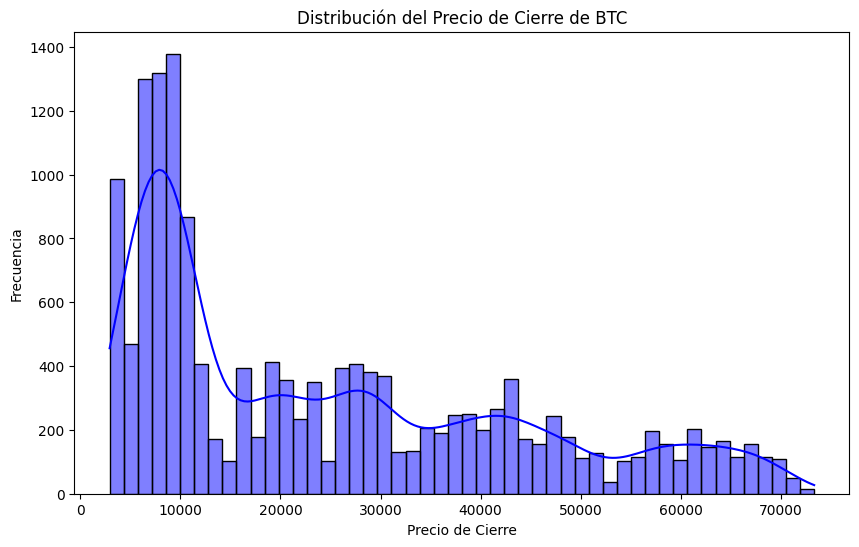

In [35]:
# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_interpolated['close'], bins=50, kde=True, color='blue')
plt.title('Distribución del Precio de Cierre de BTC')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()

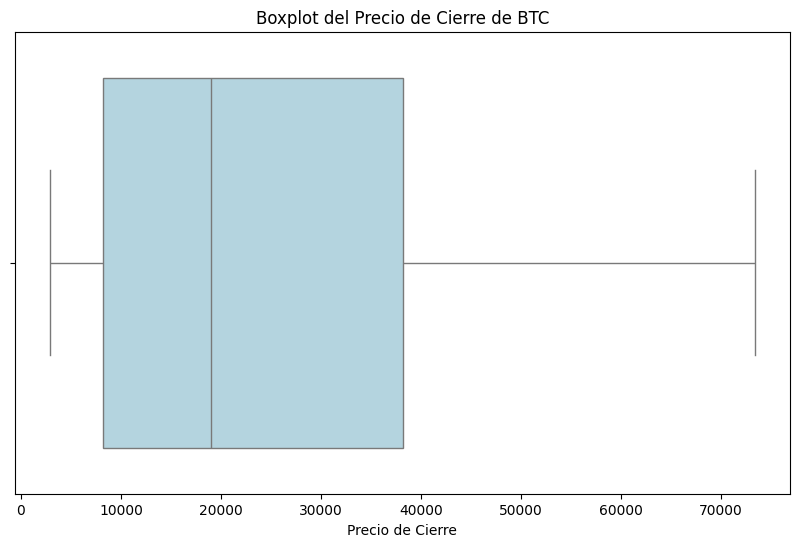

In [36]:
# Boxplot para detectar posibles valores atípicos
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_interpolated['close'], color='lightblue')
plt.title('Boxplot del Precio de Cierre de BTC')
plt.xlabel('Precio de Cierre')
plt.show()

Los datos de la serie de tiempo indican que la mediana del precio de cierre de BTC vs USDT es de 19051.7, lo que sugiere que la mitad de los valores se sitúan por debajo de este nivel, reflejando una concentración del mercado en torno a este precio, dicho comportamiento tambien se puede evidenciar en la grafica de Distribución del Precio de Cierre de BTC y en la gráfica de cajas Boxplot del Precio de Cierre de BTC. La varianza es bastante alta, con un valor de 363886806.88, lo que indica una gran dispersión de los precios en torno a la media, y esto se ve reflejado en la desviación estándar de 19075.82. Esta alta desviación estándar sugiere que el precio de BTC ha experimentado una considerable volatilidad, con grandes fluctuaciones en su valor a lo largo del tiempo. 


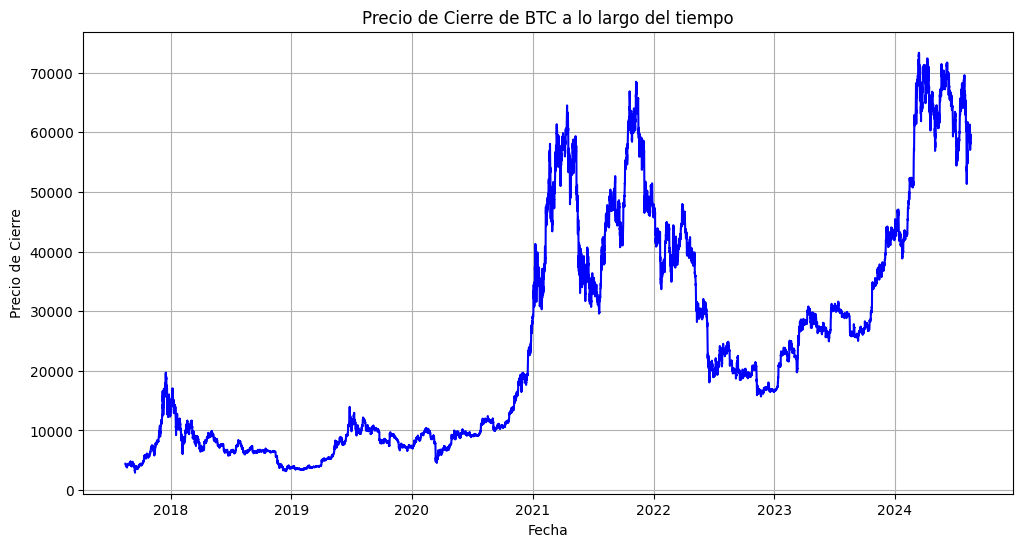

In [37]:
# Gráfico de serie temporal del precio de cierre
df_interpolated['fecha'] = df_interpolated.index
plt.figure(figsize=(12, 6))
plt.plot(df_interpolated['fecha'], df_interpolated['close'], color='blue')
plt.title('Precio de Cierre de BTC a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.grid(True)
plt.show()

Finalmente en la grafica Precio de Cierre de BTC a lo largo del tiempo, se puede evidenciar una tendencia general alcista, donde los minimos son mas altos y los maximos son mas altos, esto tomando como base la acción del precio. Tambien cabe resaltar que la grafica evidencia periodos de subidas explosivas como de correcciones abruptas, refeljando la alta volatilidad del precio de cierre (close)

3. CONCLUSIONES

El análisis de los registros históricos desde 17 de agosto de 2017 hasta el 17 de julio de 2024 muestra que el precio de cierre de BTC ha mostrado un soporte sólido en torno a los 24000 USDT, reflejando una alta actividad de compra y venta en esta zona. 

La mediana de 19051.7 USDT sugiere que la mitad de los precios están por debajo de este nivel, lo que indica una concentración del mercado alrededor de este valor. Sin embargo, la alta varianza y desviación estándar evidencian una significativa volatilidad en los precios. 

A pesar de esta volatilidad, se observa una tendencia alcista general, con mínimos y máximos ascendentes a lo largo del tiempo, intercalada con periodos de subidas explosivas y correcciones abruptas.